In [1]:
# Setup
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

# Helper functions for this exercise
def read_image(path, channels=1):
    img = Image.open(path)
    if channels == 1:
        img = img.convert('L') # Convert to grayscale
    img = np.array(img).astype('float32') / 255.0
    img = torch.from_numpy(img).unsqueeze(0).unsqueeze(0) # (1, 1, H, W)
    return img

def show_kernel(kernel, digits=2, text_size=20):
    fig, ax = plt.subplots()
    ax.imshow(kernel, cmap='gray')
    ax.axis('off')
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            ax.text(j, i, f'{kernel[i, j].item():.{digits}f}', 
                    ha='center', va='center', color='white', 
                    fontsize=text_size)
    plt.show()

def show_extraction(image, kernel, conv_stride=1, conv_padding='valid', 
                    pool_size=2, pool_stride=2, pool_padding='same',
                    subplot_shape=(1, 4), figsize=(14, 6)):
    
    # Convolutional layer
    conv_layer = nn.Conv2d(in_channels=1, out_channels=1, 
                           kernel_size=kernel.shape, stride=conv_stride, 
                           padding=conv_padding.lower())
    conv_layer.weight.data = kernel.unsqueeze(0).unsqueeze(0)
    conv_layer.bias.data.fill_(0)
    
    # Max pooling layer
    if pool_padding.lower() == 'same':
        pool_padding = pool_size // 2
    else:
        pool_padding = 0
    pool_layer = nn.MaxPool2d(kernel_size=pool_size, stride=pool_stride, padding=pool_padding)
    
    # Forward pass
    with torch.no_grad():
        conv_output = conv_layer(image)
        pool_output = pool_layer(conv_output)
    
    plt.figure(figsize=figsize)
    
    plt.subplot(*subplot_shape[:-1], 1)
    plt.imshow(image.squeeze().numpy(), cmap='magma')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(*subplot_shape[:-1], 2)
    plt.imshow(conv_output.squeeze().numpy(), cmap='magma')
    plt.title("After Convolution")
    plt.axis('off')

    plt.subplot(*subplot_shape[:-1], 3)
    plt.imshow(pool_output.squeeze().numpy(), cmap='magma')
    plt.title("After Pooling")
    plt.axis('off')
    
    plt.show()

# Set plot style
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', 
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

# Experimenting with Feature Extraction

2025-10-16 04:04:58.298178: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760587498.553515      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760587498.630387      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/learntools/computer_vision/visiontools.py:40: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if type is 'binary':
/usr/local/lib/python3.11/dist-packages/learntools/computer_vision/visiontools.py:42: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif type is 'sparse':
/usr/local/lib/python3.11/dist-packages/learntools/computer_vision/visiontools.py:302: SyntaxWarning: "is" 

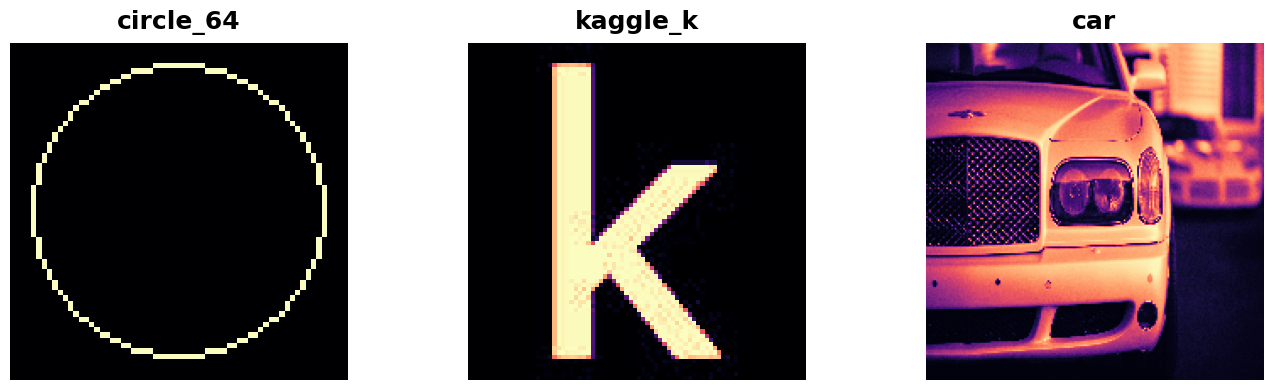

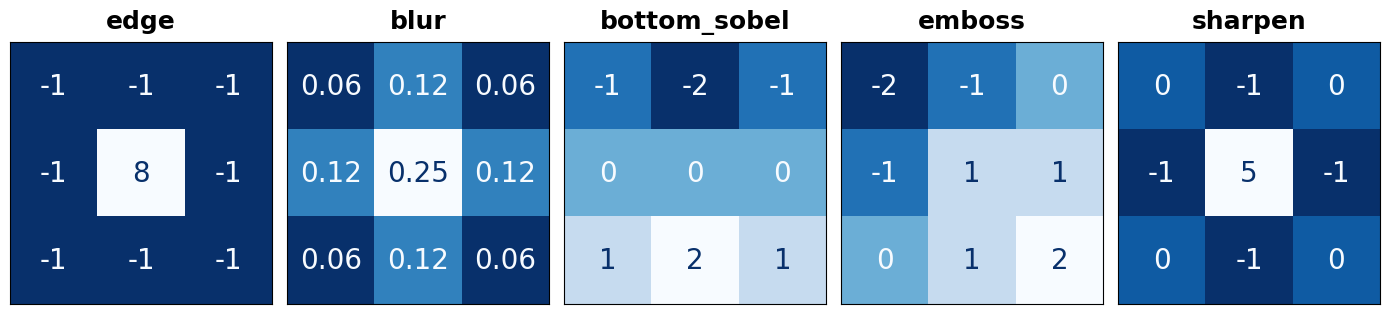

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


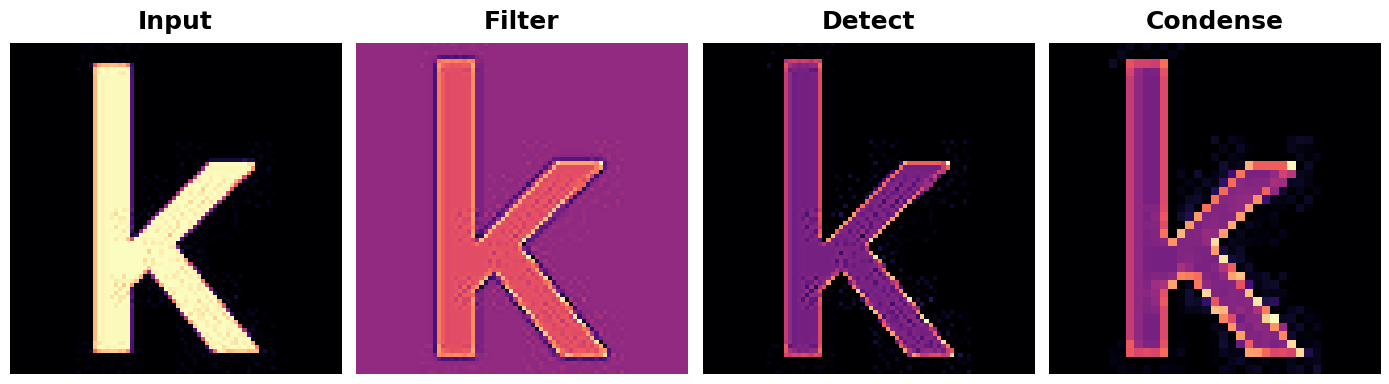

In [3]:
# Setup (This part is not in the provided image, but is necessary for the code to run)
import tensorflow as tf
import matplotlib.pyplot as plt
import learntools.computer_vision.visiontools as visiontools
from learntools.computer_vision.visiontools import circle

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

# The code for the experiment starts here
image_dir = '../input/computer-vision-resources/'

circle_64 = tf.expand_dims(circle([64, 64], val=1.0, r_shrink=4), axis=-1)
kaggle_k = visiontools.read_image(image_dir + 'k.jpg', channels=1)
car = visiontools.read_image(image_dir + 'car_illus.jpg', channels=1)
car = tf.image.resize(car, size=[200, 200])

images = [(circle_64, "circle_64"), (kaggle_k, "kaggle_k"), (car, "car")]

plt.figure(figsize=(14, 4))
for i, (img, title) in enumerate(images):
    plt.subplot(1, len(images), i+1)
    plt.imshow(tf.squeeze(img))
    plt.axis('off')
    plt.title(title)
plt.show()

from learntools.computer_vision.visiontools import edge, blur, bottom_sobel, emboss, sharpen

kernels = [(edge, "edge"), (blur, "blur"), (bottom_sobel, "bottom_sobel"),
           (emboss, "emboss"), (sharpen, "sharpen")]

plt.figure(figsize=(14, 4))
for i, (krn, title) in enumerate(kernels):
    plt.subplot(1, len(kernels), i+1)
    visiontools.show_kernel(krn, digits=2, text_size=20)
    plt.title(title)
plt.show()

# YOUR CODE HERE: choose an image
image = kaggle_k

# YOUR CODE HERE: choose a kernel
kernel = sharpen

visiontools.show_extraction(
    image, kernel,
    # YOUR CODE HERE: set parameters
    conv_stride=1,
    conv_padding='valid',
    pool_size=2,
    pool_stride=2,
    pool_padding='same',
    subplot_shape=(1, 4),
    figsize=(14, 6),
)

# One-Dimensional Convolution

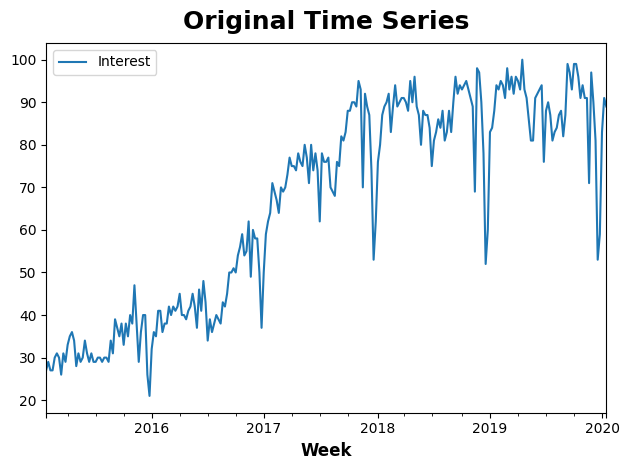

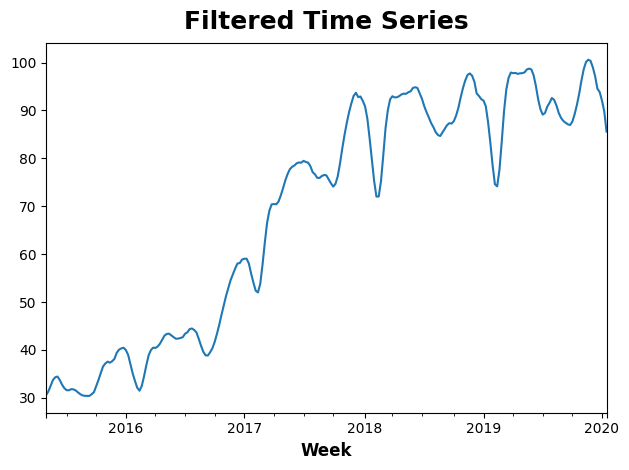

In [4]:
# Load the time series data
machinelearning = pd.read_csv(
    '../input/computer-vision-resources/machinelearning.csv',
    parse_dates=['Week'],
    index_col='Week',
)

machinelearning.plot(title="Original Time Series")
plt.show()

# Define kernels
detrend = torch.tensor([-1, 1], dtype=torch.float32)
average = torch.tensor([0.2, 0.2, 0.2, 0.2, 0.2], dtype=torch.float32)
spencer = torch.tensor([-3, -6, -5, 3, 21, 46, 67, 74, 67, 46, 32, 3, -5, -6, -3], 
                       dtype=torch.float32) / 320

# UNCOMMENT ONE
# kernel = detrend
# kernel = average
kernel = spencer

# Reformat for PyTorch
ts_data = torch.from_numpy(machinelearning.to_numpy().T).unsqueeze(0) # (N, C_in, L)
ts_data = ts_data.float()
kern = kernel.unsqueeze(0).unsqueeze(0) # (C_out, C_in, kernel_size)

# Perform 1D convolution
conv1d_layer = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=kern.shape[2], 
                         padding='valid')
conv1d_layer.weight.data = kern
conv1d_layer.bias.data.fill_(0)

with torch.no_grad():
    ts_filter = conv1d_layer(ts_data)

# Format as Pandas Series and plot
machinelearning_filtered = pd.Series(ts_filter.squeeze().numpy())
machinelearning_filtered.index = machinelearning.index[len(kernel)-1:]
machinelearning_filtered.plot(title="Filtered Time Series")
plt.show()